The European Commission regularly publishes the Emissions Database for Global Atmospheric Research (EDGAR) report on the global greenhouse gas (GHG) emissions around the world. The latest data is published here: https://edgar.jrc.ec.europa.eu/report_2024?vis=ghgpop#data_download

Using data from the above website – specifically, the data contained in the **EDGAR GHG emissions files** – prepare three charts (with the specifications described below) and, alongside each chart, provide a maximum of three bullet points explaining the main data trends.

- Chart 1 – **Evolution** of **GHG growth** in the **euro area**, **European Union (EU27)** and **worldwide**;

- Chart 2 – Comparison of countries’ GHG **emissions per capita** aggregated according to the **World Bank income groups**;

    - `CLASS.xlsx` downloaded from https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

- Chart 3 – Contribution of individual **country** and **continent** GHG emissions to **total world** GHG emissions. 

For simplicity, and to make use of the power of Jupyter, we explain everything as we do it: run this Jupyter notebook (or copy and paste the code) to get interactive charts! 

### Import data and add required aggregates

Guadeloupe, French Guiana, Martinique and Réunion are included in the Euro Area: they are part of France and adopt the Euro

In [1]:
import pandas as pd
import plotly.express as px

COLORS = ['#003299', '#FFB400', '#FF4B00', '#65B800', '#00B1EA', '#8139C6', '#077C1D'] # ECB charts color scheme (unused, but noting it down)

def add_aggregate(data_frame, aggregate_label, aggregate_name, aggregate_components): 
    data_frame_new = pd.DataFrame({aggregate_label: data_frame.loc[aggregate_components].sum()[1:]}).T
    data_frame_new['Country'] = aggregate_name
    data_frame_new = pd.concat([data_frame, data_frame_new])
    return data_frame_new

Importing GHG totals and computing Euro Area aggregate

In [2]:
EURO_AREA=[
    'AUT', 'BEL', 'HRV', 'CYP', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'PRT', 'SVK', 'SVN', 'ESP', 'GUF', 'GLP', 'MTQ', 'REU'
]
GHG_totals_by_country_original = pd.read_excel('EDGAR_2024_GHG_booklet_2024.xlsx', sheet_name='GHG_totals_by_country', index_col=0).dropna() # dropna to drop empty rows
GHG_totals_by_country = add_aggregate(GHG_totals_by_country_original, 'EURO AREA', 'EURO AREA', EURO_AREA)

Importing GHG per capita, the information from the World Bank, and computing the required aggregates.

Income groups are plugged-in by hand (still using Python) to account for some slight labelling differences between the `CLASS.xlsx` file and the `EDGAR_2024_GHG_booklet_2024.xlsx` file. In particular: 

- The income groups of pacific island and microstates for which no data was present in the GHG file, or whose GHG data was grouped with a much larger nation were ignored (This applies to: Andorra, American Samoa, Channel Islands, Curaçao, Micronesia, Fed. Sts., Guam, Isle of Man, Liechtenstein, St. Martin (French part), Monaco, Marshall Islands, Northern Mariana Islands, Nauru, San Marino, South Sudan, Sint Maarten (Dutch part), Tuvalu, Virgin Islands (U.S.), Kosovo)

- 'Guadeloupe', 'French Guiana', 'Martinique' and 'Réunion' are included among the high income countries as part of France

- Other less relevant territories whose GHG are listed separately, but which are not part of an income group were also ignored (this applies to: 'Anguilla', 'Cook Islands', 'Western Sahara', 'Falkland Islands', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Pierre and Miquelon')

- Curaçao has a different country code between the two files ('ANT' and 'CUW')

- Venezuela is also not part of an income group. ('VEN')

- Kosovo, Montenegro and Serbia are listed separately in the World Bank file, but in the GHG file they appear as "Serbia and Montenegro" ('SCG')

- Sudan and South Sudan are listed separately in the World Bank file, but in the GHG file they appear as "Sudan and South Sudan" ('SDN')

- Israel and Palestinian territories are listed separately in the World Bank file, but in the GHG file they appear as "Israel and Palestine, State of". The income level of Israel is kept for both due to the much larger population. ('ISR')

- International Aviation and Shipping are ignored.  

In [3]:

income_groups = {
    'Low income' : ['AFG', 'BFA', 'BDI', 'CAF', 'TCD', 'COD', 'ERI', 'ETH', 'GMB', 'GNB', 'PRK', 'LBR', 'MDG', 'MWI', 'MLI', 'MOZ', 'NER', 'RWA', 'SLE', 'SOM', 'SDN', 'SYR', 'TGO', 'UGA', 'YEM'], 
    'Lower middle income': ['AGO', 'BGD', 'BEN', 'BTN', 'BOL', 'CPV', 'KHM', 'CMR', 'COM', 'COG', 'CIV', 'DJI', 'EGY', 'SWZ', 'GHA', 'GIN', 'HTI', 'HND', 'IND', 'JOR', 'KEN', 'KIR', 'KGZ', 'LAO', 'LBN', 'LSO', 'MRT', 'MAR', 'MMR', 'NPL', 'NIC', 'NGA', 'PAK', 'PNG', 'PHL', 'WSM', 'STP', 'SEN', 'SLB', 'LKA', 'TJK', 'TZA', 'TLS', 'TUN', 'UZB', 'VUT', 'VNM', 'ZMB', 'ZWE'], 
    'Upper middle income': ['ALB', 'DZA', 'ARG', 'ARM', 'AZE', 'BLR', 'BLZ', 'BIH', 'BWA', 'BRA', 'CHN', 'COL', 'CRI', 'CUB', 'DMA', 'DOM', 'ECU', 'SLV', 'GNQ', 'FJI', 'GAB', 'GEO', 'GRD', 'GTM', 'IDN', 'IRN', 'IRQ', 'JAM', 'KAZ', 'LBY', 'MYS', 'MDV', 'MUS', 'MEX', 'MDA', 'MNG', 'NAM', 'MKD', 'PRY', 'PER', 'SCG', 'ZAF', 'LCA', 'VCT', 'SUR', 'THA', 'TON', 'TUR', 'TKM', 'UKR'],
    'High income': ['ATG', 'ABW', 'AUS', 'AUT', 'BHS', 'BHR', 'BRB', 'BEL', 'BMU', 'VGB', 'BRN', 'BGR', 'CAN', 'CYM', 'CHL', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FRO', 'FIN', 'FRA', 'PYF', 'DEU', 'GIB', 'GRC', 'GRL', 'GUY', 'HKG', 'HUN', 'ISL', 'IRL', 'ISR', 'ITA', 'JPN', 'KOR', 'KWT', 'LVA', 'LTU', 'LUX', 'MAC', 'MLT', 'NLD', 'NCL', 'NZL', 'NOR', 'OMN', 'PLW', 'PAN', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'SAU', 'SYC', 'SGP', 'SVK', 'SVN', 'ESP', 'KNA', 'SWE', 'CHE', 'TWN', 'TTO', 'TCA', 'ARE', 'GBR', 'USA', 'URY', 'ANT', 'GUF', 'GLP', 'MTQ', 'REU']
}
income_groups_labels = {
    'Low income' : 'LOW',
    'Lower middle income': 'L_MID',
    'Upper middle income': 'H_MID',
    'High income': 'HIGH',
}

all_income_groups_CLASS = sum (income_groups.values(), [])
GHG_per_capita_by_country = pd.read_excel('EDGAR_2024_GHG_booklet_2024.xlsx', sheet_name='GHG_per_capita_by_country', index_col=0).dropna() # dropna to drop empty rows
CLASS = pd.read_excel('CLASS.xlsx', sheet_name='List of economies')

for income_group, income_group_countries in income_groups.items(): 
    GHG_totals_by_country = add_aggregate(GHG_totals_by_country, income_groups_labels[income_group], income_group, income_group_countries)


Dividing countries by region. Using World Bank regions for consistency

In [19]:
region_dictionary = {
    region: CLASS[CLASS.Region==region].Code.to_list()
    for region in CLASS.Region.unique()
}

region_dictionary_reverse={}
for region in region_dictionary.keys():
    for code in region_dictionary[region]:
        region_dictionary_reverse[code] = region 
# Adding in missing data
region_dictionary_reverse['AIA'] = 'Latin America & Caribbean'
region_dictionary_reverse['AIR'] = 'International Aviation'
region_dictionary_reverse['ANT'] = 'Latin America & Caribbean'
region_dictionary_reverse['COK'] = 'East Asia & Pacific'
region_dictionary_reverse['ESH'] = 'Middle East & North Africa'
region_dictionary_reverse['FLK'] = 'Latin America & Caribbean'
region_dictionary_reverse['GLP'] = 'Latin America & Caribbean'
region_dictionary_reverse['GUF'] = 'Latin America & Caribbean'
region_dictionary_reverse['MTQ'] = 'Latin America & Caribbean'
region_dictionary_reverse['REU'] = 'Sub-Saharan Africa'
region_dictionary_reverse['SCG'] = 'Europe & Central Asia'
region_dictionary_reverse['SEA'] = 'International Shipping'
region_dictionary_reverse['SHN'] = 'Sub-Saharan Africa'
region_dictionary_reverse['SPM'] = 'North America'

region_reverse_series = pd.Series(region_dictionary_reverse)

region_dictionary = {
        region : [code for code in region_reverse_series[region_reverse_series==region].index.to_list() if code in GHG_totals_by_country.index]
        for region in region_reverse_series.unique()
    }
region_dictionary

region_labels = {
    'South Asia' :'SAS',
    'Europe & Central Asia' :'ECS',
    'Middle East & North Africa' :'MEA',
    'East Asia & Pacific' :'EAS',
    'Sub-Saharan Africa' :'SSF',
    'Latin America & Caribbean' :'LCN',
    'North America' :'NAC',
    'International Aviation' :'AIR',
    'International Shipping' :'SEA', 
    'GLOBAL TOTAL': 'GLOBAL TOTAL'
}

GHG_totals_by_country_continent = GHG_totals_by_country_original.copy()

# for region in region_dictionary.keys():
#     if region not in GHG_totals_by_country_continent.index:
#         if region not in ['International Aviation', 'International Shipping']:
#             GHG_totals_by_country_continent = add_aggregate(GHG_totals_by_country_continent, region_labels[region], region, region_dictionary[region])
GHG_totals_by_country_continent
GHG_totals_by_country_continent = GHG_totals_by_country_continent.drop('EU27')
GHG_totals_by_country_continent = GHG_totals_by_country_continent.drop('GLOBAL TOTAL')
# GHG_totals_by_country_continent = GHG_totals_by_country_continent.drop(dropping)
# GHG_totals_by_country_continent['Region'] = [region_dictionary_reverse[index] if index not in region_labels.values() else ('GLOBAL TOTAL' if index != 'GLOBAL TOTAL' else '')  for index in GHG_totals_by_country_continent.index ]
GHG_totals_by_country_continent['Region'] = [region_dictionary_reverse[index] if index not in region_labels.values() else 'International Aviation and Shipping'  for index in GHG_totals_by_country_continent.index ]
dropping = GHG_totals_by_country_continent[GHG_totals_by_country_continent.Region.isin(['', 'GLOBAL TOTAL'])  & ~GHG_totals_by_country_continent.Country.isin(['International Shipping', 'International Aviation'])].index


### Chart 1
First, we compute the growth from the emission totals by differentiating. We cannot get information from the first period, as no data is present for 1969. Then, we plot the first chart

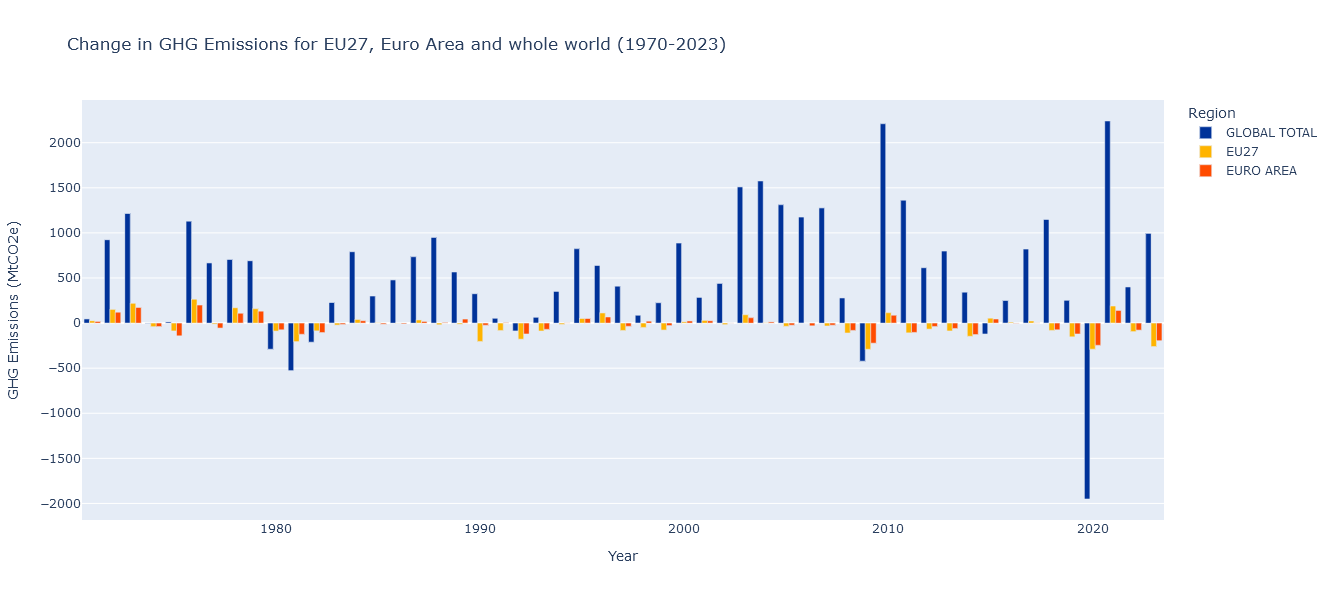

In [24]:

# GHG growth from one year to the next
GHG_growth_by_country = GHG_totals_by_country.drop(columns='Country').diff(periods=1, axis=1).iloc[:, 1:]
GHG_growth_by_country.insert(0, 'Country', GHG_totals_by_country.Country)
# Filter required columns 
df = GHG_growth_by_country.loc[['GLOBAL TOTAL', 'EU27', 'EURO AREA']]
# # Plot (built-in function)
# df = df.set_index('Country')
# plt = df.T.plot(kind='bar', figsize=(18, 10), color={'GLOBAL TOTAL': '#003299', 'EU27': '#FFB400',  'EURO AREA':'#FF4B00', 'United States': '#65B800'}, grid=True)
# plt.axhline(0, color='k', linestyle='dashed')
# Melt
df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="Emissions")

fig = px.bar(
    df_long,
    x="Year",                # Year on the x-axis
    y="Emissions",              # Emissions on the y-axis
    color="Country",       # Use income group for color differentiation
    title="Change in GHG Emissions for EU27, Euro Area and whole world (1970-2023)",
    labels={"Country": "Region", "Emissions": "GHG Emissions (MtCO2e)"},  # Axis labels
    color_discrete_sequence=COLORS,
    barmode="group",             # Grouped bars for each year
    height = 600,
    width = 1350
)
fig.show()

#### KEY TRENDS

- Global greenhouse gas (GHG) emissions have shown a consistent upward trend between 1971 and 2023.

- The European Union (EU) and the Euro Area have made significant progress in reducing GHG emissions, with a clear downward trend. However, these efforts alone are insufficient to drive a meaningful global impact. 

- Within the European Union, the Euro Area is responsible for the majority of the observed changes in GHG emissions.

### Chart 2

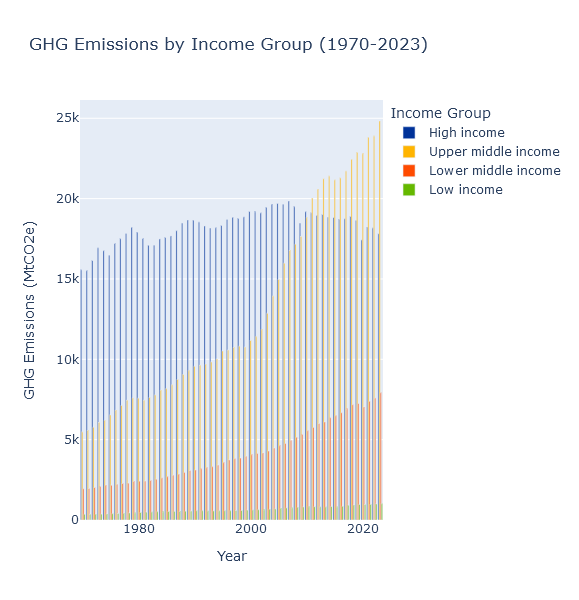

In [6]:
# Filter required columns 
df = GHG_totals_by_country.loc[['HIGH','H_MID', 'L_MID', 'LOW']]
# # Plot (built-in function)
# df = df.set_index('Country')
# plt = df.T.plot(kind='bar', figsize=(30, 10), color={'High income': '#003299', 'Upper middle income': '#FFB400',  'Lower middle income':'#FF4B00', 'Low income': '#65B800'}, grid=True)
# plt.axhline(0, color='k', linestyle='dashed')
# Melt
df_long = df.melt(id_vars=["Country"], var_name="Year", value_name="Emissions")
# Plot (plotly)
fig = px.bar(
    df_long,
    x="Year",                # Year on the x-axis
    y="Emissions",              # Emissions on the y-axis
    color="Country",       # Use income group for color differentiation
    title="GHG Emissions by Income Group (1970-2023)",
    labels={"Country": "Income Group", "Emissions": "GHG Emissions (MtCO2e)"},  # Axis labels
    color_discrete_map={'High income': COLORS[0], 'Upper middle income': COLORS[1],  'Lower middle income':COLORS[2], 'Low income': COLORS[3]},
    barmode="group",             # Grouped bars for each year
    height = 600,
    width = 1350
)
fig.show()

#### KEY TRENDS

- Greenhouse gas (GHG) emissions in high-income countries have remained relatively stable over the period analyzed, with a notable downward trend beginning in 2007.

- GHG emissions in upper-middle-income countries have surged significantly since 1971, with rapid acceleration around 2000, making them the largest contributors to global emissions by 2010.

- While GHG emissions in lower-middle-income and low-income countries have risen during the same period, their comparatively lower levels remain less concerning for now.

### Chart 3

In [20]:
import ipywidgets as widgets
from IPython.display import display

# Create the IntSlider widget
year_selector = widgets.IntSlider(value = 2023, min=1970, max=2023, description="Year:")

chart_type_selector = widgets.ToggleButtons(
    options=['Treemap', 'Sunburst', 'Icicle'],
    description="Chart Type:",
    value='Treemap'  # Default value
)
# Create an Output widget to display the chart
out = widgets.Output()

# Define the function to update the chart
def update_chart(change = None):
    with out:
        out.clear_output()  # Clear previous output                
        # Determine chart type
        chart_type = chart_type_selector.value
        year_value = year_selector.value
        if chart_type == 'Icicle': 
            fig = px.icicle(
                GHG_totals_by_country_continent,
                path=[px.Constant("Global Total"), 'Region', 'Country'],
                values=year_value,  # Use the updated value from the slider
                color='Region',
                color_discrete_map={
                    '(?)': 'lightgrey',
                    'East Asia & Pacific': COLORS[0],
                    'Europe & Central Asia': COLORS[1],
                    'North America': COLORS[2],
                    'South Asia': COLORS[3],
                    'Middle East & North Africa': COLORS[4],
                    'Latin America & Caribbean': COLORS[5],
                    'Sub-Saharan Africa': COLORS[6],
                },
                width=1100,
                height=1500,
            )
        elif chart_type == 'Sunburst': 
            fig = px.sunburst(
                GHG_totals_by_country_continent,
                path=[px.Constant("Global Total"), 'Region', 'Country'],
                values=year_value,  # Use the updated value from the slider
                color='Region',
                color_discrete_map={
                    '(?)': 'lightgrey',
                    'East Asia & Pacific': COLORS[0],
                    'Europe & Central Asia': COLORS[1],
                    'North America': COLORS[2],
                    'South Asia': COLORS[3],
                    'Middle East & North Africa': COLORS[4],
                    'Latin America & Caribbean': COLORS[5],
                    'Sub-Saharan Africa': COLORS[6],
                },
                width=1100,
                height=1500,
            )
        elif chart_type == 'Treemap': 
            fig = px.treemap(
                GHG_totals_by_country_continent,
                path=[px.Constant("Global Total"), 'Region', 'Country'],
                values=year_value,  # Use the updated value from the slider
                color='Region',
                color_discrete_map={
                    '(?)': 'lightgrey',
                    'East Asia & Pacific': COLORS[0],
                    'Europe & Central Asia': COLORS[1],
                    'North America': COLORS[2],
                    'South Asia': COLORS[3],
                    'Middle East & North Africa': COLORS[4],
                    'Latin America & Caribbean': COLORS[5],
                    'Sub-Saharan Africa': COLORS[6],
                },
                width=1100,
                height=1500,
            )
        fig.update_traces(root_color="lightgrey")
        fig.update_layout(margin=dict(t=30, l=0, r=0, b=0))
        fig.update_layout(title=f"Countries' contributions to GHG emission in year {year_value}")
        fig.show()
# Attach the update function to the widgets
year_selector.observe(update_chart, names='value')
chart_type_selector.observe(update_chart, names='value')

# Display the slider and the chart
display(widgets.VBox([year_selector, chart_type_selector]), out)

update_chart()

Output()

## KEY TRENDS

- China significantly contributes to global greenhouse gas (GHG) emissions, dominating the "East Asia & Pacific" region and the global total.

- Different regions contribute unevenly to global GHG emissions. "East Asia & Pacific," "North America," and "Europe & Central Asia" are prominent contributors compared to regions like "Sub-Saharan Africa" and "Latin America & Caribbean."

- Countries like Brazil, Indonesia, and Saudi Arabia are noteworthy contributors in their respective regions, reflecting the environmental impact of emerging economies. 